### **Introdução ao Python**

**O que é Python**: Uma linguagem de programação interpretada, de alto nível, e fácil de aprender.


**Popularidade em Ciência de Dados**: Versatilidade, grande número de bibliotecas (NumPy, pandas, Matplotlib), comunidade ativa.

## **Projeto**
Projeto prático que simula um problema real de mercado.

**Tema**: Energia & Sustentabilidade & Economia

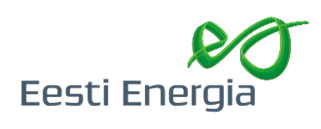

https://www.enefit.ee/en

A Eesti Energia AS é uma **empresa pública de energia limitada na Estônia**. É a maior empresa de **xisto betuminoso** para energia do mundo.

Em 2014, operava na Estônia, Letônia, Lituânia, Finlândia, Jordânia e Utah (Estados Unidos).

O grupo tem três áreas principais de operação:
- geração de eletricidade
- produção de óleo de xisto
- venda e distribuição de eletricidade

**Nosso contexto**

**Quem é você**: Você é um analista de dados de uma fábrica.

**Problema**: O custo da energia interfere na produção da fabrica, logo, quanto maior o custo da energia maior será o custo de produção.

**Seu Papel**: Estudar os dados de custo de energia e sugrir um plano de ação para baixar o custo



In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-dark')

In [26]:
'''
forecast_date: A data e hora em que a previsão do preço foi feita.
euros_per_mwh: O preço em euros por megawatt-hora (MWh) de eletricidade para o momento específico indicado pela forecast_date.
origin_date: A data e hora de origem dos dados.
data_block_id: Um identificador para o bloco de dados específico.
'''
Base_PrecoEletricidade = pd.read_csv('electricity_prices.csv')
Base_PrecoEletricidade.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [27]:
Base_PrecoEletricidade.shape

(15286, 4)

In [28]:
Base_PrecoEletricidade.dtypes

,0
forecast_date,object
euros_per_mwh,float64
origin_date,object
data_block_id,int64


In [29]:
# Convertendo para data
Base_PrecoEletricidade.forecast_date = pd.to_datetime( Base_PrecoEletricidade.forecast_date )
Base_PrecoEletricidade.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [30]:
# Gerando datas
Base_PrecoEletricidade['ano'] = Base_PrecoEletricidade.forecast_date.dt.year
Base_PrecoEletricidade['mes'] = Base_PrecoEletricidade.forecast_date.dt.month
Base_PrecoEletricidade['dia'] = Base_PrecoEletricidade.forecast_date.dt.day
Base_PrecoEletricidade['data'] = Base_PrecoEletricidade.forecast_date.dt.date
Base_PrecoEletricidade['hora'] = Base_PrecoEletricidade.forecast_date.dt.hour

Base_PrecoEletricidade.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id,ano,mes,dia,data,hora
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1,2021,9,1,2021-09-01,0
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1,2021,9,1,2021-09-01,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1,2021,9,1,2021-09-01,2
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1,2021,9,1,2021-09-01,3
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1,2021,9,1,2021-09-01,4


In [31]:
# Describe para estatísticas
Base_PrecoEletricidade.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
forecast_date,15286,2022-07-16 11:16:41.857909248,2021-09-01 00:00:00,2022-02-07 05:15:00,2022-07-16 11:30:00,2022-12-22 16:45:00,2023-05-30 23:00:00,NaN
euros_per_mwh,15286.0,157.064176,-10.06,85.29,128.28,199.7975,4000.0,121.148625
data_block_id,15286.0,318.99071,1.0,160.0,319.0,478.0,637.0,183.890301
ano,15286.0,2022.043896,2021.0,2022.0,2022.0,2022.0,2023.0,0.651992
mes,15286.0,6.458851,1.0,3.0,6.0,10.0,12.0,3.672383
dia,15286.0,15.678333,1.0,8.0,16.0,23.0,31.0,8.773668
hora,15286.0,11.501243,0.0,6.0,12.0,17.75,23.0,6.922013


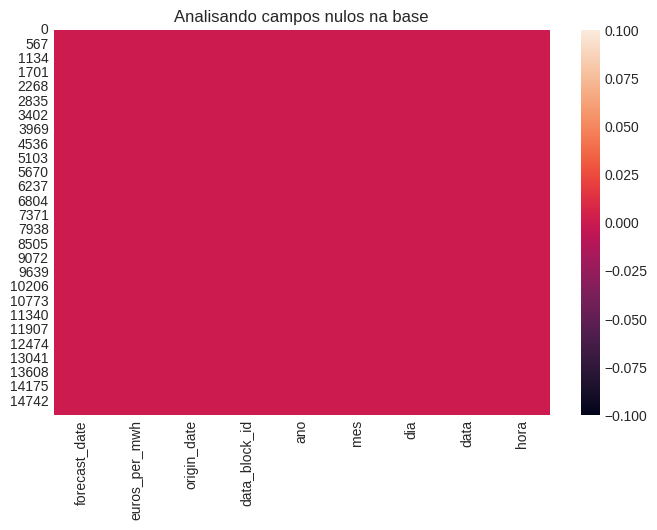

In [32]:
plt.figure( figsize=(8, 5) )
plt.title('Analisando campos nulos na base')
sns.heatmap( Base_PrecoEletricidade.isnull() );

In [33]:
# Gerando analise diária
anl_serie_media_preco = Base_PrecoEletricidade.groupby( by=['data'] ).agg(
    media_preco = ('euros_per_mwh', 'mean')
)

# Gerando médias móveis e tendências
anl_serie_media_preco['mm7d'] = anl_serie_media_preco.media_preco.rolling( window=30 ).mean()
anl_serie_media_preco['mm30d'] = anl_serie_media_preco.media_preco.rolling( window=7 ).mean()

anl_serie_media_preco.head()

,media_preco,mm7d,mm30d
data,,,
2021-09-01,110.467083,NaN,NaN
2021-09-02,112.631250,NaN,NaN
2021-09-03,107.429583,NaN,NaN
2021-09-04,106.112917,NaN,NaN
2021-09-05,99.045417,NaN,NaN


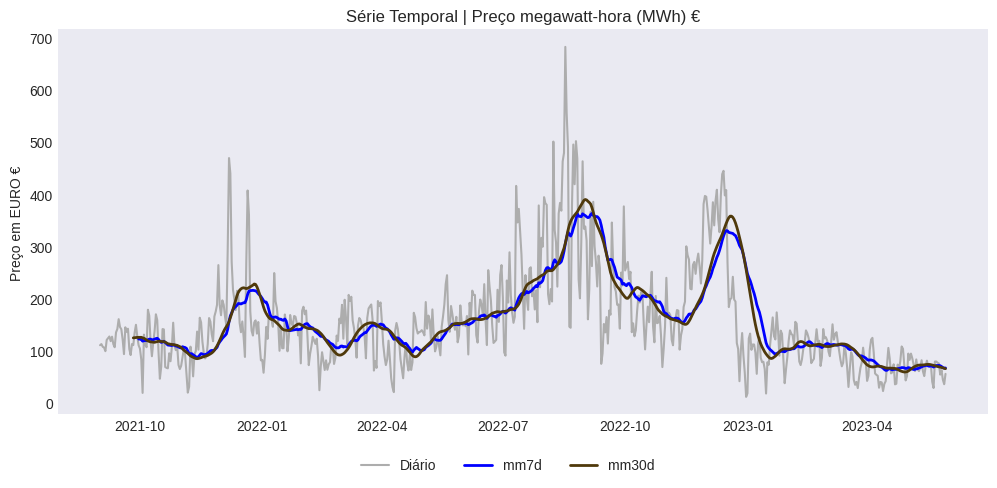

In [34]:
# Estilo
plt.figure( figsize=(12, 5) )
plt.title('Série Temporal | Preço megawatt-hora (MWh) €')
plt.plot( anl_serie_media_preco['media_preco'], color='#adadad', label='Diário' )
plt.plot( anl_serie_media_preco['mm7d'], color='blue', label='mm7d', linewidth=2 )
plt.plot( anl_serie_media_preco['mm30d'].rolling(window=20).mean(), color='#4f390b', label='mm30d', linewidth=2 )
plt.legend(loc='upper left', bbox_to_anchor=(0.32, -0.1), ncol=3, borderaxespad=0);
plt.ylabel('Preço em EURO €');

In [35]:
# Gerando Data para o Boxplot
Base_PrecoEletricidade['data_boxplot'] = Base_PrecoEletricidade['ano'].astype('str') + '-' + Base_PrecoEletricidade['mes'].astype('str')
Base_PrecoEletricidade.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id,ano,mes,dia,data,hora,data_boxplot
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1,2021,9,1,2021-09-01,0,2021-9
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1,2021,9,1,2021-09-01,1,2021-9
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1,2021,9,1,2021-09-01,2,2021-9
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1,2021,9,1,2021-09-01,3,2021-9
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1,2021,9,1,2021-09-01,4,2021-9


In [36]:
# Analisar distribuição
Base_PrecoEletricidade.groupby( by=['ano'] ).describe()['euros_per_mwh']

,count,mean,min,25%,50%,75%,max,std
ano,,,,,,,,
2021,2928.0,137.159225,0.07,87.5925,118.10,171.275,1000.07,91.774243
2022,8759.0,192.834105,-0.04,104.4300,160.76,249.420,4000.00,135.654697
2023,3599.0,86.203626,-10.06,47.3650,85.59,115.580,263.74,47.389201


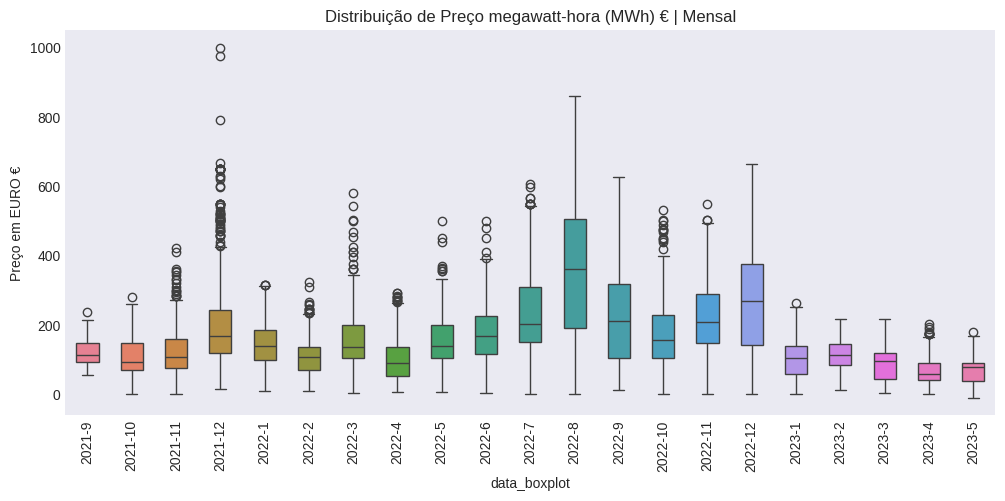

In [37]:
# Boxplot
plt.figure( figsize=(12, 5) )
plt.title('Distribuição de Preço megawatt-hora (MWh) € | Mensal' )
sns.boxplot(
    data=Base_PrecoEletricidade.loc[ Base_PrecoEletricidade.euros_per_mwh < 4000 ], # retirar o Outliers
    x='data_boxplot', y='euros_per_mwh',
    width=0.5,
    hue='data_boxplot',
)
plt.ylabel('Preço em EURO €')
plt.xticks(rotation=90);

In [38]:
# Mapa de calor
# Dias x Meses = 2023
anl_diaMes = Base_PrecoEletricidade.loc[ Base_PrecoEletricidade.ano == 2023 ].groupby(
    by=['mes', 'dia'] ).agg(
      media_preco = ('euros_per_mwh', 'mean')
        ).reset_index().pivot_table(
            index='dia', columns='mes', values='media_preco')

anl_diaMes

mes,1,2,3,4,5
dia,,,,,
1,18.233750,118.898750,125.707917,42.130417,51.135833
2,123.368333,138.925417,119.227500,51.809167,94.409167
3,132.755417,132.345417,97.911667,101.870833,82.300833
4,101.679583,129.534167,89.409583,121.097083,94.417917
5,111.936250,111.457500,117.855000,124.567917,85.388333
6,111.801667,155.304583,150.513750,96.013750,73.289167
7,96.199583,151.828333,121.077917,56.361250,60.880000
8,55.662500,115.922083,131.964583,53.727083,83.210833
9,114.088750,79.248750,135.410417,51.989583,64.601667


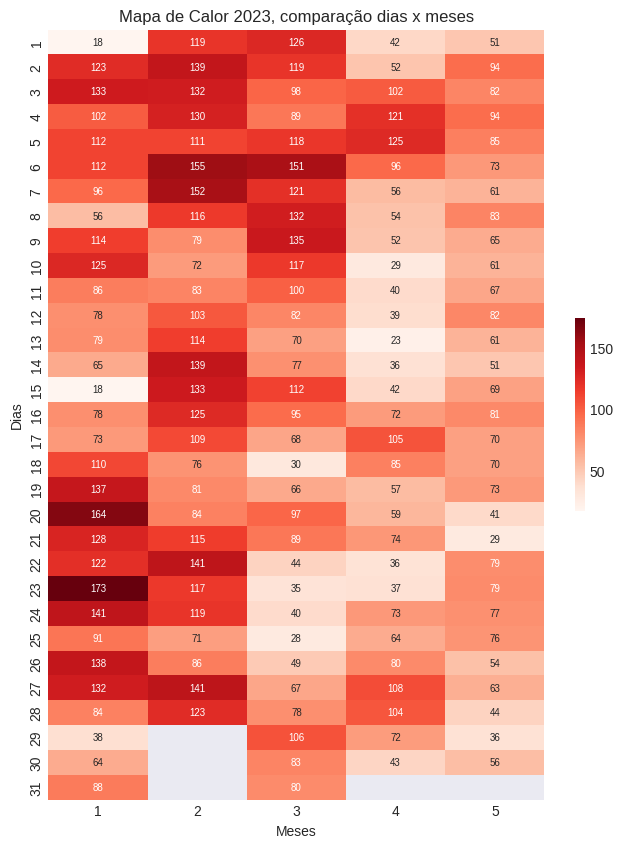

In [39]:
plt.figure( figsize=(8, 10) )

sns.heatmap(
    anl_diaMes,
    cmap='Reds',
    annot=True, fmt='.0f',
    annot_kws={"size": 7},
    cbar_kws={'shrink': 0.25}
)
plt.title('Mapa de Calor 2023, comparação dias x meses')
plt.xlabel('Meses')
plt.ylabel('Dias');

In [40]:
anl_horaDia = Base_PrecoEletricidade.loc[ Base_PrecoEletricidade.ano == 2023 ].groupby(
    by=['dia', 'hora'] ).agg(
      media_preco = ('euros_per_mwh', 'mean')
        ).reset_index().pivot_table(
            index='hora', columns='dia', values='media_preco')

anl_horaDia

dia,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
hora,,,,,,,,,,,,,,,,,,,,,
0,43.696,74.098,58.102,86.034,85.822,97.226,86.870,55.424,79.102,63.686,...,69.996,70.852,59.588,68.022,65.354,73.992,84.978,46.7075,39.0975,31.300
1,37.118,71.252,54.498,70.072,83.772,89.836,83.672,60.072,67.004,48.180,...,64.164,64.482,56.212,42.952,54.686,74.106,79.802,44.1200,35.2675,31.550
2,40.264,70.402,54.216,82.364,81.380,88.436,83.614,57.736,53.454,47.924,...,64.354,51.652,53.788,33.640,55.120,82.014,58.696,42.9425,31.0950,31.310
3,45.320,68.894,57.900,81.454,81.900,88.548,84.450,57.514,50.624,55.288,...,68.178,54.562,65.938,30.992,46.948,83.966,50.800,43.0500,29.3925,31.990
4,55.786,74.632,76.896,76.720,85.524,95.878,87.416,65.298,71.742,66.236,...,70.638,65.070,71.968,34.148,52.932,88.344,72.826,56.8075,35.9050,34.455
5,63.642,80.480,100.288,86.312,90.926,108.458,89.082,74.580,77.456,76.004,...,87.976,80.406,78.742,53.324,62.096,98.498,94.064,71.6650,57.7900,54.815
6,75.236,108.106,116.156,105.560,94.682,128.278,100.838,92.632,99.154,96.616,...,86.140,98.812,92.460,75.702,95.494,123.272,104.564,77.9300,73.0350,107.730
7,99.076,125.224,158.642,129.220,116.632,149.778,106.698,113.924,117.134,108.868,...,89.696,113.758,107.492,96.482,101.530,145.798,124.830,84.6975,90.3550,121.395
8,90.722,134.978,160.666,127.828,119.548,160.506,115.362,123.626,122.238,111.954,...,98.884,122.180,103.346,83.774,105.976,144.228,120.270,81.4225,93.9850,143.600


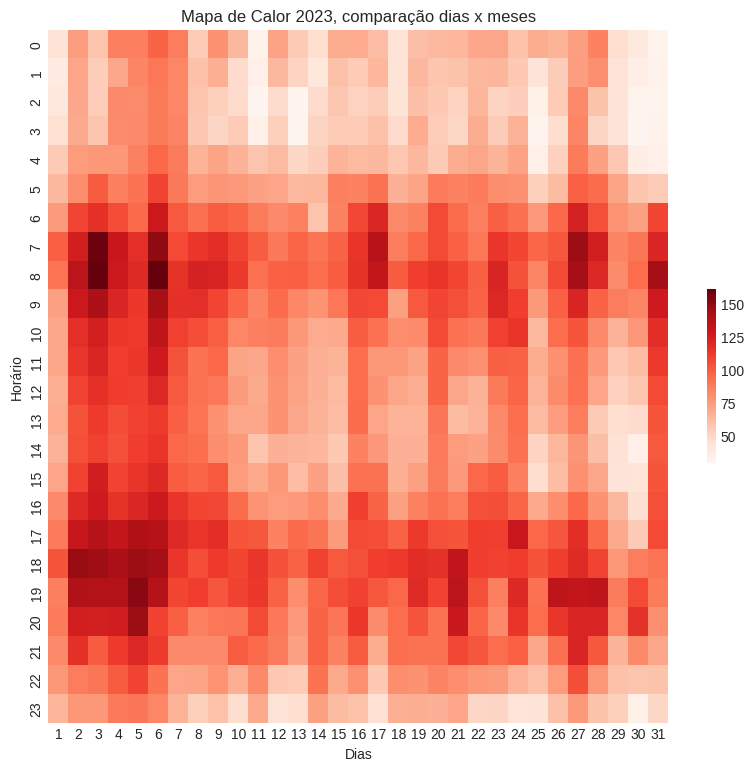

In [41]:
plt.figure( figsize=(10, 9) )

sns.heatmap(
    anl_horaDia,
    cmap='Reds',
    annot=False,
    cbar_kws={'shrink': 0.25}
)
plt.title('Mapa de Calor 2023, comparação dias x meses')
plt.xlabel('Dias')
plt.ylabel('Horário');

Sugestão para reduzir custo de produção:

1. Analisando o comportamento entre os **dias x horário**, o custo médio da energia é mais barato entre: 22h ~ 5h, **é quase 3x mais barato que produzir em horário comercial**.

# Proposta de como alavancar o uso de dados na DOA:


Para alavancar o uso de Dados na DOA, segue um mapa mental de como a estratégia deve seguir:

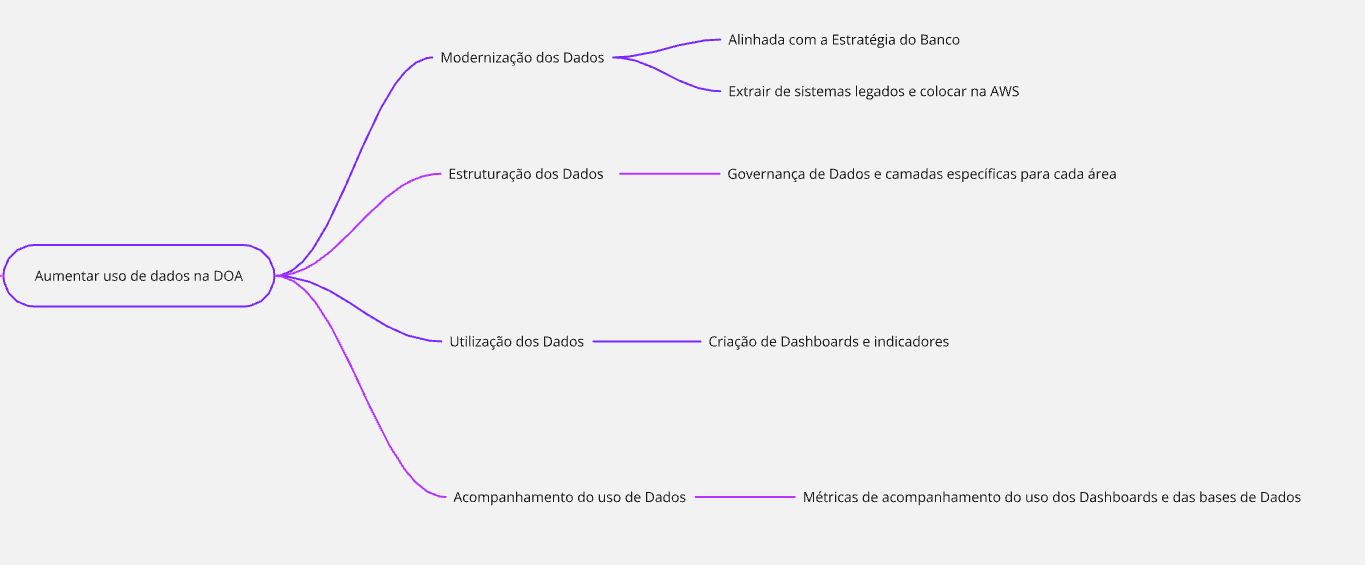

- Com maior uso de Dados, temos como tomar decisões mais assertivas pois possuem dados para baseá-las.

- Decisões mais assertivas nos permitem melhores resultados.

- Com dados é possível entender as dores dos clientes/área, clusterizar por características semelhantes e tomar melhroes decisões!

- Pensando em Operações, uma das dores que podem ser atacadas é o tempo de SLA: com dados podemos parametrizar os SLA, entender quais demoram mais, investigar os porquês, propor soluções e fazer o acompanhamento das ações!